# Generate composite galaxy

Finall, in this example we're going to demonstrate how to make a composite galaxy, including with imaging. For more information on defining parametric morphology see the Imaging examples.

In [1]:
from unyt import yr, Myr, kpc, mas
import matplotlib.pyplot as plt
import numpy as np
from synthesizer.grid import Grid
from synthesizer.parametric.morphology import Sersic2D
from synthesizer.parametric.sfzh import SFH, ZH, generate_sfzh, generate_instant_sfzh
from synthesizer.parametric.galaxy import Galaxy
from synthesizer.filters import UVJ

Let's begin by defining the geometry of the images:

In [2]:
# Define geometry of the images
resolution = 0.05 * kpc  # resolution in kpc
fov = resolution.value * 50 * kpc

And initialising the `Grid` object:

In [3]:
grid_dir = '../../../tests/test_grid'
grid_name = 'test_grid'
grid = Grid(grid_name, grid_dir=grid_dir)

And initialising a `FilterCollection`, in this case the rest-frame UVJ filters.

In [4]:
filters = UVJ(new_lam=grid.lam)

## Disk

Let's now build the disk component of our composite galaxy.

Starting by defining the morphology:

In [5]:
morph = Sersic2D(r_eff_kpc=1. * kpc, n= 1., ellip=0.5, theta=35.)

Define the parameters of the star formation and metal enrichment histories

In [6]:
sfh_p = {'duration': 10 * Myr}
Z_p = {'log10Z': -2.0}  # can also use linear metallicity e.g. {'Z': 0.01}
stellar_mass = 10 ** 8.5

Define the functional form of the star formation and metal enrichment histories

In [7]:
sfh = SFH.Constant(sfh_p)  # constant star formation
Zh = ZH.deltaConstant(Z_p)  # constant metallicity

Get the 2D star formation and metal enrichment history for the given SPS grid. This is (age, Z).

In [8]:
sfzh = generate_sfzh(
    grid.log10age, grid.metallicity, sfh, Zh, stellar_mass=stellar_mass
)

Initialise the Galaxy object, make an image and plot it. In this case, we can make a colour image using our UVJ filters:

----------
SUMMARY OF PARAMETRIC GALAXY
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣀⣀⡀⠒⠒⠦⣄⡀⠀⠀⠀⠀⠀⠀⠀
        ⠀⠀⠀⠀⠀⢀⣤⣶⡾⠿⠿⠿⠿⣿⣿⣶⣦⣄⠙⠷⣤⡀⠀⠀⠀⠀
        ⠀⠀⠀⣠⡾⠛⠉⠀⠀⠀⠀⠀⠀⠀⠈⠙⠻⣿⣷⣄⠘⢿⡄⠀⠀⠀
        ⠀⢀⡾⠋⠀⠀⠀⠀⠀⠀⠀⠀⠐⠂⠠⢄⡀⠈⢿⣿⣧⠈⢿⡄⠀⠀
        ⢀⠏⠀⠀⠀⢀⠄⣀⣴⣾⠿⠛⠛⠛⠷⣦⡙⢦⠀⢻⣿⡆⠘⡇⠀⠀
        ---+-+-+-+-+-+-+-+-+-+-+-+---
           |S|Y|N|T|H|E|S|I|Z|E|R|
        ---+-+-+-+-+-+-+-+-+-+-+-+---
        ⠀⠀⢸⡇⠸⣿⣷⠀⢳⡈⢿⣦⣀⣀⣀⣠⣴⣾⠟⠁⠀⠀⠀⠀⢀⡎
        ⠀⠀⠘⣷⠀⢻⣿⣧⠀⠙⠢⠌⢉⣛⠛⠋⠉⠀⠀⠀⠀⠀⠀⣠⠎⠀
        ⠀⠀⠀⠹⣧⡀⠻⣿⣷⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣠⡾⠃⠀⠀
        ⠀⠀⠀⠀⠈⠻⣤⡈⠻⢿⣿⣷⣦⣤⣤⣤⣤⣤⣴⡾⠛⠉⠀⠀⠀⠀
        ⠀⠀⠀⠀⠀⠀⠈⠙⠶⢤⣈⣉⠛⠛⠛⠛⠋⠉⠀⠀⠀⠀⠀⠀⠀⠀
        ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠉⠉⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
<class 'synthesizer.parametric.galaxy.Galaxy'>
log10(stellar mass formed/Msol):             8.5
available SEDs: ['incident']
available lines: []
available images: []
----------



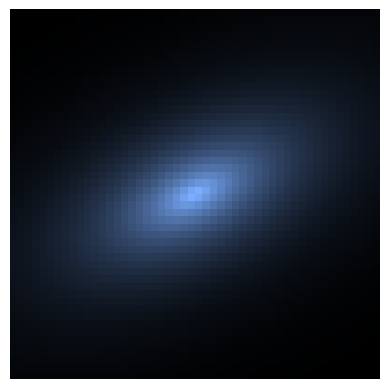

In [9]:
# Initialise Galaxy object
disk = Galaxy(morph=morph, sfzh=sfzh)

# Generate stellar spectra
disk.get_spectra_incident(grid)

# Make images
disk_img = disk.make_images(
    resolution=resolution,
    filters=filters,
    sed=disk.spectra["incident"],
    fov=fov,
)

print(disk)

# Make and plot an rgb image
disk_img.make_rgb_image(rgb_filters={"R" : 'J',
                                   "G" : 'V',
                                   "B" : 'U'})
fig, ax, _ = disk_img.plot_rgb_image(show=True)

## Bulge

Lets do the same but make a Bulge this time to combine.

----------
SUMMARY OF PARAMETRIC GALAXY
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣀⣀⡀⠒⠒⠦⣄⡀⠀⠀⠀⠀⠀⠀⠀
        ⠀⠀⠀⠀⠀⢀⣤⣶⡾⠿⠿⠿⠿⣿⣿⣶⣦⣄⠙⠷⣤⡀⠀⠀⠀⠀
        ⠀⠀⠀⣠⡾⠛⠉⠀⠀⠀⠀⠀⠀⠀⠈⠙⠻⣿⣷⣄⠘⢿⡄⠀⠀⠀
        ⠀⢀⡾⠋⠀⠀⠀⠀⠀⠀⠀⠀⠐⠂⠠⢄⡀⠈⢿⣿⣧⠈⢿⡄⠀⠀
        ⢀⠏⠀⠀⠀⢀⠄⣀⣴⣾⠿⠛⠛⠛⠷⣦⡙⢦⠀⢻⣿⡆⠘⡇⠀⠀
        ---+-+-+-+-+-+-+-+-+-+-+-+---
           |S|Y|N|T|H|E|S|I|Z|E|R|
        ---+-+-+-+-+-+-+-+-+-+-+-+---
        ⠀⠀⢸⡇⠸⣿⣷⠀⢳⡈⢿⣦⣀⣀⣀⣠⣴⣾⠟⠁⠀⠀⠀⠀⢀⡎
        ⠀⠀⠘⣷⠀⢻⣿⣧⠀⠙⠢⠌⢉⣛⠛⠋⠉⠀⠀⠀⠀⠀⠀⣠⠎⠀
        ⠀⠀⠀⠹⣧⡀⠻⣿⣷⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣠⡾⠃⠀⠀
        ⠀⠀⠀⠀⠈⠻⣤⡈⠻⢿⣿⣷⣦⣤⣤⣤⣤⣤⣴⡾⠛⠉⠀⠀⠀⠀
        ⠀⠀⠀⠀⠀⠀⠈⠙⠶⢤⣈⣉⠛⠛⠛⠛⠋⠉⠀⠀⠀⠀⠀⠀⠀⠀
        ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠉⠉⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
<class 'synthesizer.parametric.galaxy.Galaxy'>
log10(stellar mass formed/Msol):             10.0
available SEDs: ['incident']
available lines: []
available images: []
----------



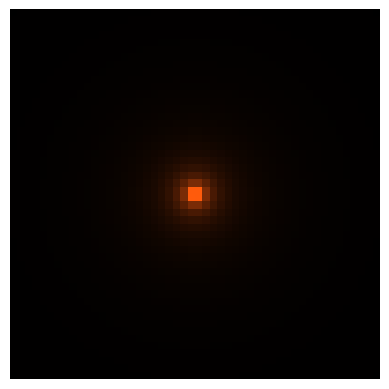

In [10]:
# Define bulge morphology
morph = Sersic2D(r_eff_kpc=1. * kpc, n=4.)

# Define the parameters of the star formation and metal enrichment histories
stellar_mass = 1E10
sfzh = generate_instant_sfzh(
    grid.log10age, grid.metallicity, 10., 0.01,
    stellar_mass=stellar_mass)

# Get galaxy object
bulge = Galaxy(morph=morph, sfzh=sfzh)

# Get specrtra
bulge.get_spectra_incident(grid)

# make images
bulge_img = bulge.make_images(
    resolution=resolution,
    filters=filters,
    sed=bulge.spectra["incident"],
    fov=fov,
)

print(bulge)

# Make and plot an rgb image
bulge_img.make_rgb_image(rgb_filters={"R" : 'J',
                                   "G" : 'V',
                                   "B" : 'U'})
fig, ax, _ = bulge_img.plot_rgb_image(show=True)

## Total

Finally we can combine the disk and bulge together to make a composite galaxy.

----------
SUMMARY OF PARAMETRIC GALAXY
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣀⣀⡀⠒⠒⠦⣄⡀⠀⠀⠀⠀⠀⠀⠀
        ⠀⠀⠀⠀⠀⢀⣤⣶⡾⠿⠿⠿⠿⣿⣿⣶⣦⣄⠙⠷⣤⡀⠀⠀⠀⠀
        ⠀⠀⠀⣠⡾⠛⠉⠀⠀⠀⠀⠀⠀⠀⠈⠙⠻⣿⣷⣄⠘⢿⡄⠀⠀⠀
        ⠀⢀⡾⠋⠀⠀⠀⠀⠀⠀⠀⠀⠐⠂⠠⢄⡀⠈⢿⣿⣧⠈⢿⡄⠀⠀
        ⢀⠏⠀⠀⠀⢀⠄⣀⣴⣾⠿⠛⠛⠛⠷⣦⡙⢦⠀⢻⣿⡆⠘⡇⠀⠀
        ---+-+-+-+-+-+-+-+-+-+-+-+---
           |S|Y|N|T|H|E|S|I|Z|E|R|
        ---+-+-+-+-+-+-+-+-+-+-+-+---
        ⠀⠀⢸⡇⠸⣿⣷⠀⢳⡈⢿⣦⣀⣀⣀⣠⣴⣾⠟⠁⠀⠀⠀⠀⢀⡎
        ⠀⠀⠘⣷⠀⢻⣿⣧⠀⠙⠢⠌⢉⣛⠛⠋⠉⠀⠀⠀⠀⠀⠀⣠⠎⠀
        ⠀⠀⠀⠹⣧⡀⠻⣿⣷⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣠⡾⠃⠀⠀
        ⠀⠀⠀⠀⠈⠻⣤⡈⠻⢿⣿⣷⣦⣤⣤⣤⣤⣤⣴⡾⠛⠉⠀⠀⠀⠀
        ⠀⠀⠀⠀⠀⠀⠈⠙⠶⢤⣈⣉⠛⠛⠛⠛⠋⠉⠀⠀⠀⠀⠀⠀⠀⠀
        ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠉⠉⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
<class 'synthesizer.parametric.galaxy.Galaxy'>
log10(stellar mass formed/Msol):             10.013520922108038
available SEDs: ['incident']
available lines: []
available images: []
----------



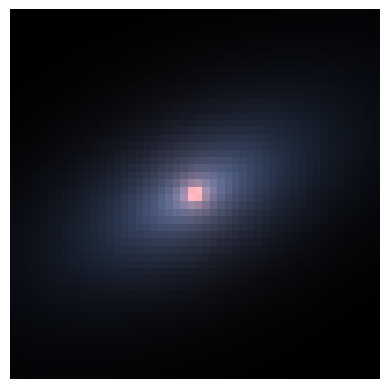

In [11]:
# Combine galaxy objects
combined = disk + bulge

print(combined)

# Combine images
total = disk_img + bulge_img

# Make and plot an rgb image
total.make_rgb_image(rgb_filters={"R" : 'J',
                                   "G" : 'V',
                                   "B" : 'U'})
fig, ax, _ = total.plot_rgb_image(show=True)

And plot the spectra for good measure...

/Users/sw376/Dropbox/Research/projects/synthesizer/venv/lib/python3.10/site-packages/unyt/array.py:1802: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


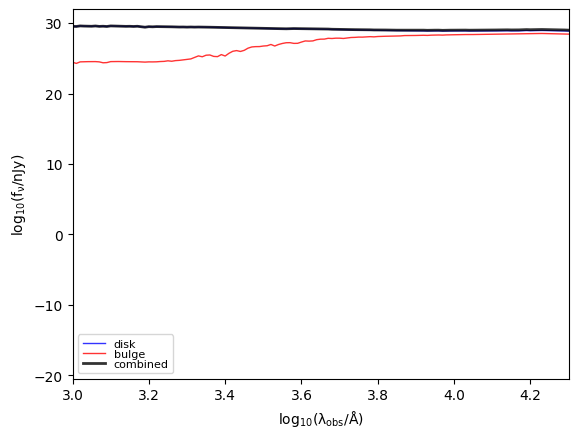

In [12]:
sed = disk.spectra['incident']
plt.plot(np.log10(sed.lam), np.log10(sed.lnu), lw=1, alpha=0.8, c='b',
            label='disk')

sed = bulge.spectra['incident']
plt.plot(np.log10(sed.lam), np.log10(sed.lnu), lw=1, alpha=0.8, c='r',
            label='bulge')

sed = combined.spectra['incident']
plt.plot(np.log10(sed.lam), np.log10(sed.lnu), lw=2, alpha=0.8, c='k',
            label='combined')

plt.xlim(3., 4.3)
plt.legend(fontsize=8, labelspacing=0.0)
plt.xlabel(r'$\rm log_{10}(\lambda_{obs}/\AA)$')
plt.ylabel(r'$\rm log_{10}(f_{\nu}/nJy)$')

plt.show()